# Outlier Removal using Standard Deviation and Z-Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('blr_prices.csv')

In [3]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [4]:
#Check min, max and mean values
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


Above we can see there is a huge difference between max and mean value of price_per_sqft, thus there are quite a few outliers in this dataset. So we will first remove these outliers using percentile then we will use Z-score and Standard Deviation one by one.

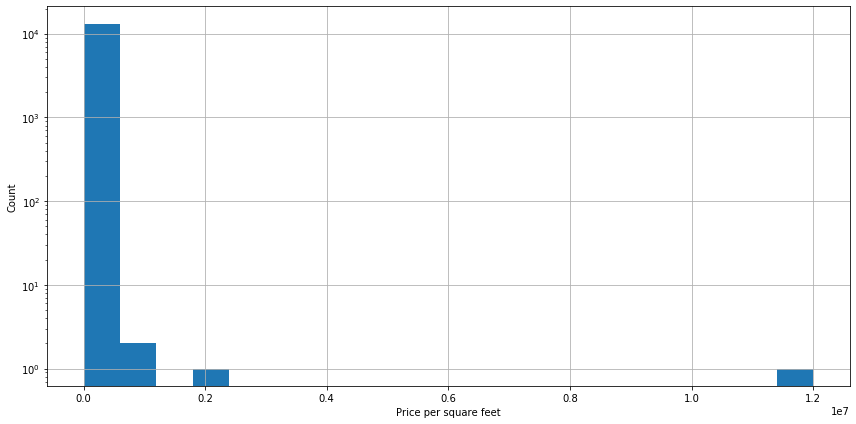

In [5]:
plt.figure(figsize=(12,6))
data.price_per_sqft.hist(bins=20)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.yscale('log')
plt.tight_layout()

With above visualization we can clearly see that there are some bad outliers in this dataset.

### Handle Outliers using Percentile technique

In [6]:
#Calculate minimum and maximum threshold using quantile
min_threshold, max_threshold = data.price_per_sqft.quantile([0.001,0.999])

In [7]:
print("Minimum threshold",min_threshold)
print("Maximum threshold",max_threshold)

Minimum threshold 1366.184
Maximum threshold 50959.36200000099


In [8]:
data[(data['price_per_sqft']<min_threshold) | (data['price_per_sqft']>max_threshold) ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3,130.0,3,371
798,other,4 Bedroom,10961.0,4,80.0,4,729
1005,other,1 BHK,15.0,1,30.0,1,200000
1106,other,5 Bedroom,24.0,2,150.0,5,625000
1867,other,3 Bedroom,52272.0,2,140.0,3,267
2392,other,4 Bedroom,2000.0,3,25.0,4,1250
3934,other,1 BHK,1500.0,1,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4,120.0,4,12000000
4924,other,7 BHK,5.0,7,115.0,7,2300000


In above dataframe there are values such as 416,500 which are very low prices for bangalore city and also there are ridiculous prices such as 12000000 and 2300000 which are clearly outliers.

In [9]:
data_new=data[(data['price_per_sqft']>min_threshold) & (data['price_per_sqft']<max_threshold) ]
data_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [10]:
print("Old dataset shape: ", data.shape)
print("New dataset shape after removing outliers using percentile technique: ",data_new.shape)

Old dataset shape:  (13200, 7)
New dataset shape after removing outliers using percentile technique:  (13172, 7)


In [11]:
#Dataset after removing outliers using Percentile technique
data_new.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [12]:
data_new.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


Now we can analyse through our mean and maximum value of new dataset that there is some amount of deviation of values from mean. Thus we need to remove more outliers too.

### Handle Outliers using Standard Deviation

In [13]:
#Find mean value
mean=data_new['price_per_sqft'].mean()
mean

6663.6537351958705

In [14]:
#Find standard deviation value
std=data_new['price_per_sqft'].std()
std

4141.020700174605

In [15]:
#Find upper limit and lower limit 
upper_limit= mean+ 4*std
lower_limit= mean-4*std

In [16]:
print("Lower limit :", lower_limit)
print("Upper limit :", upper_limit)

Lower limit : -9900.429065502549
Upper limit : 23227.73653589429


In [17]:
data_new[(data_new['price_per_sqft']<lower_limit) | (data_new['price_per_sqft']>upper_limit) ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4,1250.0,4,23719
760,other,9 Bedroom,600.0,9,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5,325.0,4,27083
13127,other,4 Bedroom,1200.0,5,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1,220.0,1,44000


In [18]:
data_without_outlier_using_sd= data_new[(data_new['price_per_sqft']>lower_limit) & (data_new['price_per_sqft']<upper_limit) ]
data_without_outlier_using_sd

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [19]:
print("Old dataset shape: ", data_new.shape)
print("New dataset shape after removing outliers using Standard deviation: ",data_without_outlier_using_sd.shape)

Old dataset shape:  (13172, 7)
New dataset shape after removing outliers using Standard deviation:  (13047, 7)


<b>We removed 125 outliers

### Handle Outliers using Z-score

<b>Z score</b> is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.<br> <br>

<center> <b>Z score = (x -mean) / std. deviation

<img src="Capture.png"> </img>

In [20]:
#Find Z-score of each value
data_new['zscore']=(data['price_per_sqft']-mean)/std

d:\Profiles\sahsrivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data_new.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.582864


In [22]:
#Using 4 standard deviation
data_new[(data_new['zscore']>4 )| (data_new['zscore']<-4) ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1,220.0,1,44000,9.016218


In [23]:
data_without_outlier_using_zscore= data_new[(data_new['zscore']<4 ) & (data_new['zscore']>-4) ]
data_without_outlier_using_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.903967


In [24]:
print("Old dataset shape: ", data_new.shape)
print("New dataset shape after removing outliers using Z-Score: ",data_without_outlier_using_zscore.shape)

Old dataset shape:  (13172, 8)
New dataset shape after removing outliers using Z-Score:  (13047, 8)


<b>Here also, we removed 125 outliers

### Visualize Price_per_sqft column after removing outliers

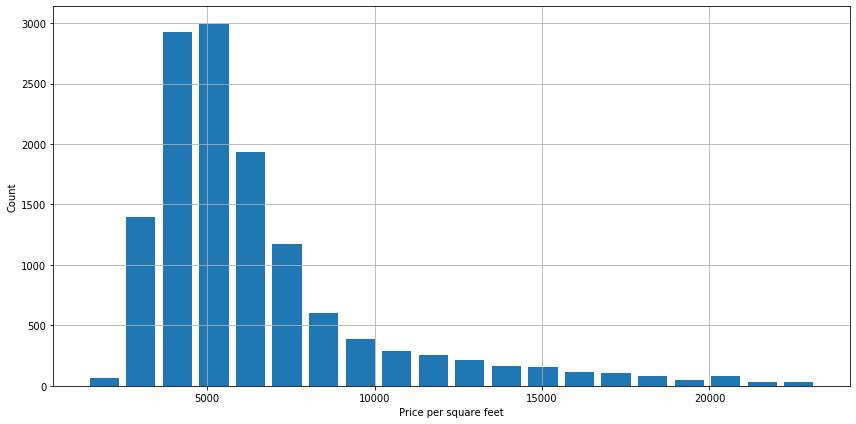

In [25]:
plt.figure(figsize=(12,6))
data_without_outlier_using_sd.price_per_sqft.hist(bins=20,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.tight_layout()

<b> Conclusion: </b> Both Standard deviation and Z-score are similar techniques which remove outliers on the basis of Mean and Standard Deviation

<b>References: </b>
1. https://www.youtube.com/watch?v=KFuEAGR3HS4
2. https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/